 Loading the necessary libraries to be used in this project (Colins Cheruiyot)

In [11]:
# Step 1: Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Setting the style for the plots
sns.set(style="whitegrid")


Step 2: Loading the Dataset

In [18]:
# Step 2: Loading the AmesHousing Dataset
data = pd.read_csv('D:/Sankhyana Consultancy/MachineLearning/Project/ML Algorithms Project 1/AmesHousing.csv')  
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Step 3: Data Exploration

In [21]:
# Step 3: Data Exploration
# Checking the shape of the dataset
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 2930 rows and 82 columns.


In [23]:
# Getting a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [25]:
# Checking for missing values
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data[missing_data > 0]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

Step 4: Data Cleaning

Step 5: Separating Numeric and Categorical Columns

In [29]:
# Separating numeric and categorical columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

Step 6: Data Cleaning

In [32]:
# Filling missing values
# 1. Filling missing values for numeric columns with the median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
# 2. Filling missing values for categorical columns with the mode (most frequent value)
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))
# Check if missing values are handled
print("\nMissing values after cleaning:")
print(data.isnull().sum())



Missing values after cleaning:
Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64


In [34]:
# Converting categorical variables into numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

In [36]:
# Inspect the columns of the DataFrame
print(data.columns)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=263)


Step 7: Preparing Data for Modeling

In [39]:
# Splitting the data into features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)  
y = data['SalePrice']

Step 8: Splitting the Dataset into Training and Testing Sets

In [42]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Step 9: Training the Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 10: Making Predictions on the Test Set

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)

Step 11: Evaluating the Model

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-Squared:", r2)


Model Evaluation:
Mean Squared Error (MSE): 1386339498.9729695
R-Squared: 0.8027806082481382


Step 12: Plotting Actual vs Predicted Values

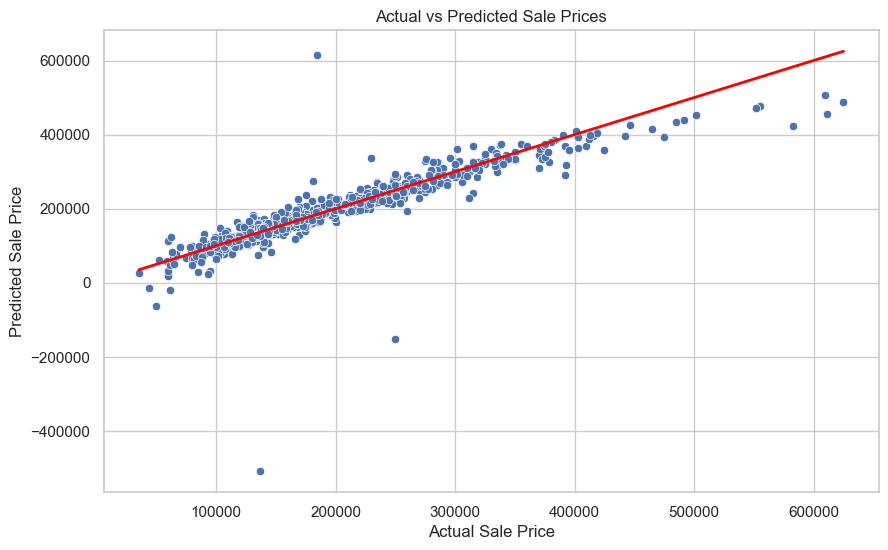

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.show()

In [4]:
import joblib
# Saving the trained model as a binary (.bin) file
joblib.dump(model, 'linear_regression_model.bin')
print("Model saved as 'linear_regression_model.bin'")

Model saved as 'linear_regression_model.bin'


In [8]:
# Load the model from the .bin file
loaded_model = joblib.load('linear_regression_model.bin')
# Loading the  model to make predictions
loaded_predictions = loaded_model.predict(X_test)

NameError: name 'X_test' is not defined